<a href="https://colab.research.google.com/github/taekjunkim/artiphysiology2020/blob/main/get_resnet50_center_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

stim_path ='/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(torch.cuda.get_device_name(0))  
else:
    device = torch.device("cpu")



import torchvision.models as models
import torch.nn as nn

import numpy as np;

import torchvision.datasets as datasets
import torchvision.transforms as transforms


In [ ]:
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose(
    #Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] 
    #to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] 
    #if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
    # or if the numpy.ndarray has dtype = np.uint8
    [transforms.ToTensor(),
     #normalization of pre-trained networks:
     #from docs:
     #All pre-trained models expect input images normalized in the same way, 
     #i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where
     #H and W are expected to be at least 224. The images have to be loaded 
     #in to a range of [0, 1] and then normalized using 
     #mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. 
     transforms.Normalize([0.485, 0.456, 0.406], 
                          [0.229, 0.224, 0.225])])#

# Comment 1 : Load the datasets with ImageFolder
image_datasets = datasets.ImageFolder(root= stim_path, transform=data_transforms)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=10, shuffle=False, num_workers=2);

In [ ]:
print(image_datasets.imgs[199])

('/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class01/stim0199.png', 1)


In [ ]:
resnet50 = models.resnet50(pretrained=True);
resnet50.eval();
resnet50.to(device);

outputs = []; #simple function to store outputs
def store_output(module,input,output):
    #input = list(input)[0]
    cPos = int(np.ceil(np.shape(output)[2]/2)-1);
    outputs.append(output[:,:,cPos,cPos]);


blk_num = 0;
for i in range(len(resnet50.layer2)):
    if i>=1:
        blk_num += 1;
        resnet50.layer2[i].bn3.register_forward_hook(store_output);
        resnet50.layer2[i].relu.inplace = False;
        print(str(blk_num)+': layer2-'+str(i+1));
for i in range(len(resnet50.layer3)):
    blk_num += 1;  
    resnet50.layer3[i].bn3.register_forward_hook(store_output);
    resnet50.layer3[i].relu.inplace = False;
    print(str(blk_num)+': layer3-'+str(i+1));
for i in range(len(resnet50.layer4)):
    blk_num += 1;  
    resnet50.layer4[i].bn3.register_forward_hook(store_output);
    resnet50.layer4[i].relu.inplace = False;
    print(str(blk_num)+': layer3-'+str(i+1));


"""
blk_num = 0;
for i,blk in enumerate(resnet50.layer2.children()):
    if i>=1:
        blk_num += 1;
        blk.register_forward_hook(store_output);
        print(str(blk_num)+': layer2-'+str(i+1));
for i,blk in enumerate(resnet50.layer3.children()):
    blk_num += 1;  
    blk.register_forward_hook(store_output);
    print(str(blk_num)+': layer3-'+str(i+1));    
for i,blk in enumerate(resnet50.layer4.children()):
    blk_num += 1;  
    blk.register_forward_hook(store_output);
    print(str(blk_num)+': layer4-'+str(i+1));
"""

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth



1: layer2-2
2: layer2-3
3: layer2-4
4: layer3-1
5: layer3-2
6: layer3-3
7: layer3-4
8: layer3-5
9: layer3-6
10: layer3-1
11: layer3-2
12: layer3-3


"\nblk_num = 0;\nfor i,blk in enumerate(resnet50.layer2.children()):\n    if i>=1:\n        blk_num += 1;\n        blk.register_forward_hook(store_output);\n        print(str(blk_num)+': layer2-'+str(i+1));\nfor i,blk in enumerate(resnet50.layer3.children()):\n    blk_num += 1;  \n    blk.register_forward_hook(store_output);\n    print(str(blk_num)+': layer3-'+str(i+1));    \nfor i,blk in enumerate(resnet50.layer4.children()):\n    blk_num += 1;  \n    blk.register_forward_hook(store_output);\n    print(str(blk_num)+': layer4-'+str(i+1));\n"

In [ ]:
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
resnet50_outputs = [];
for i, (images,labels) in enumerate(dataloaders):

    if torch.cuda.is_available():  
        images = images.cuda();
    #images = Variable(images.float());
    #Test input
    outputs = [];
    out = resnet50(images)

    print('batch(size 10)# '+str(i)+' was processed')

    if torch.cuda.is_available():  
        for j in range(len(outputs)):
            outputs[j] = outputs[j].cpu();
    if i==0:
        resnet50_outputs = outputs;
        for j in range(len(outputs)):
            resnet50_outputs[j] = resnet50_outputs[j].detach().numpy();
    else:
        for j in range(len(outputs)):
            resnet50_outputs[j] = np.append(resnet50_outputs[j],outputs[j].detach().numpy(),axis=0);


batch(size 10)# 0 was processed
batch(size 10)# 1 was processed
batch(size 10)# 2 was processed
batch(size 10)# 3 was processed
batch(size 10)# 4 was processed
batch(size 10)# 5 was processed
batch(size 10)# 6 was processed
batch(size 10)# 7 was processed
batch(size 10)# 8 was processed
batch(size 10)# 9 was processed
batch(size 10)# 10 was processed
batch(size 10)# 11 was processed
batch(size 10)# 12 was processed
batch(size 10)# 13 was processed
batch(size 10)# 14 was processed
batch(size 10)# 15 was processed
batch(size 10)# 16 was processed
batch(size 10)# 17 was processed
batch(size 10)# 18 was processed
batch(size 10)# 19 was processed
batch(size 10)# 20 was processed
batch(size 10)# 21 was processed
batch(size 10)# 22 was processed
batch(size 10)# 23 was processed
batch(size 10)# 24 was processed
batch(size 10)# 25 was processed
batch(size 10)# 26 was processed
batch(size 10)# 27 was processed
batch(size 10)# 28 was processed
batch(size 10)# 29 was processed
batch(size 10)# 30 w

In [ ]:
len(resnet50_outputs)

12

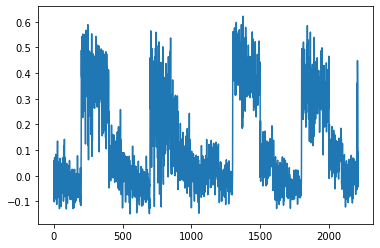

In [ ]:
import matplotlib.pyplot as plt;   ### ReLu - True

plt.plot(resnet50_outputs[6][:,11]);      

In [ ]:
import matplotlib.pyplot as plt;   ### ReLu - False

plt.plot(resnet50_outputs[6][:,11].clip(0));      

In [ ]:
import os;
os.chdir(stim_path)
np.savez('resnet50_outputs.npz',layer2_2=resnet50_outputs[0],
                                layer2_3=resnet50_outputs[1],
                                layer2_4=resnet50_outputs[2],
                                layer3_1=resnet50_outputs[3],
                                layer3_2=resnet50_outputs[4],
                                layer3_3=resnet50_outputs[5],
                                layer3_4=resnet50_outputs[6],
                                layer3_5=resnet50_outputs[7],
                                layer3_6=resnet50_outputs[8],
                                layer4_1=resnet50_outputs[9], 
                                layer4_2=resnet50_outputs[10],
                                layer4_3=resnet50_outputs[11]);

In [ ]:
data = np.load('resnet50_outputs.npz');
plt.plot(resnet50_outputs[6][:,11]);      